# Set up workspace

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
#from eofs.xarray import Eof 

In [3]:
import cftime
import scipy

In [4]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [5]:
from load_ensembles import *
import quick_map

In [6]:
path_in='/glade/work/czarakas/coupled_PPE/data/data_for_figures/'

# Load data

In [7]:
ds = xr.open_dataset(path_in+'delta_TSKIN_Annual_mean.nc')
from load_gridcell_areas import *

# Figure 1a

In [8]:
landweights_lat = landfrac/landfrac.sum(dim=['lon'])
TSKIN_zonal=(ds.TSKIN*landweights_lat).sum(dim=['lon'])

In [9]:
TSKIN_zonal=(ds.TSKIN*landweights_lat).sum(dim=['lon'])

In [10]:
descriptions=crosswalk.description.values

descs_plantwater=[ 'medlynslope, max',
 'medlynintercept, min',
                   'kmax, min',
 'kmax, max',
                   'medlynslope, min',
 'medlynintercept, max']

descs_hydro=['d_max, min',
 'd_max, max',
 'frac_sat_soil_dsl_init, min',
 'frac_sat_soil_dsl_init, max',
 'fff, min',
 'fff, max',
 'sand_pf, min',
 'sand_pf, max']

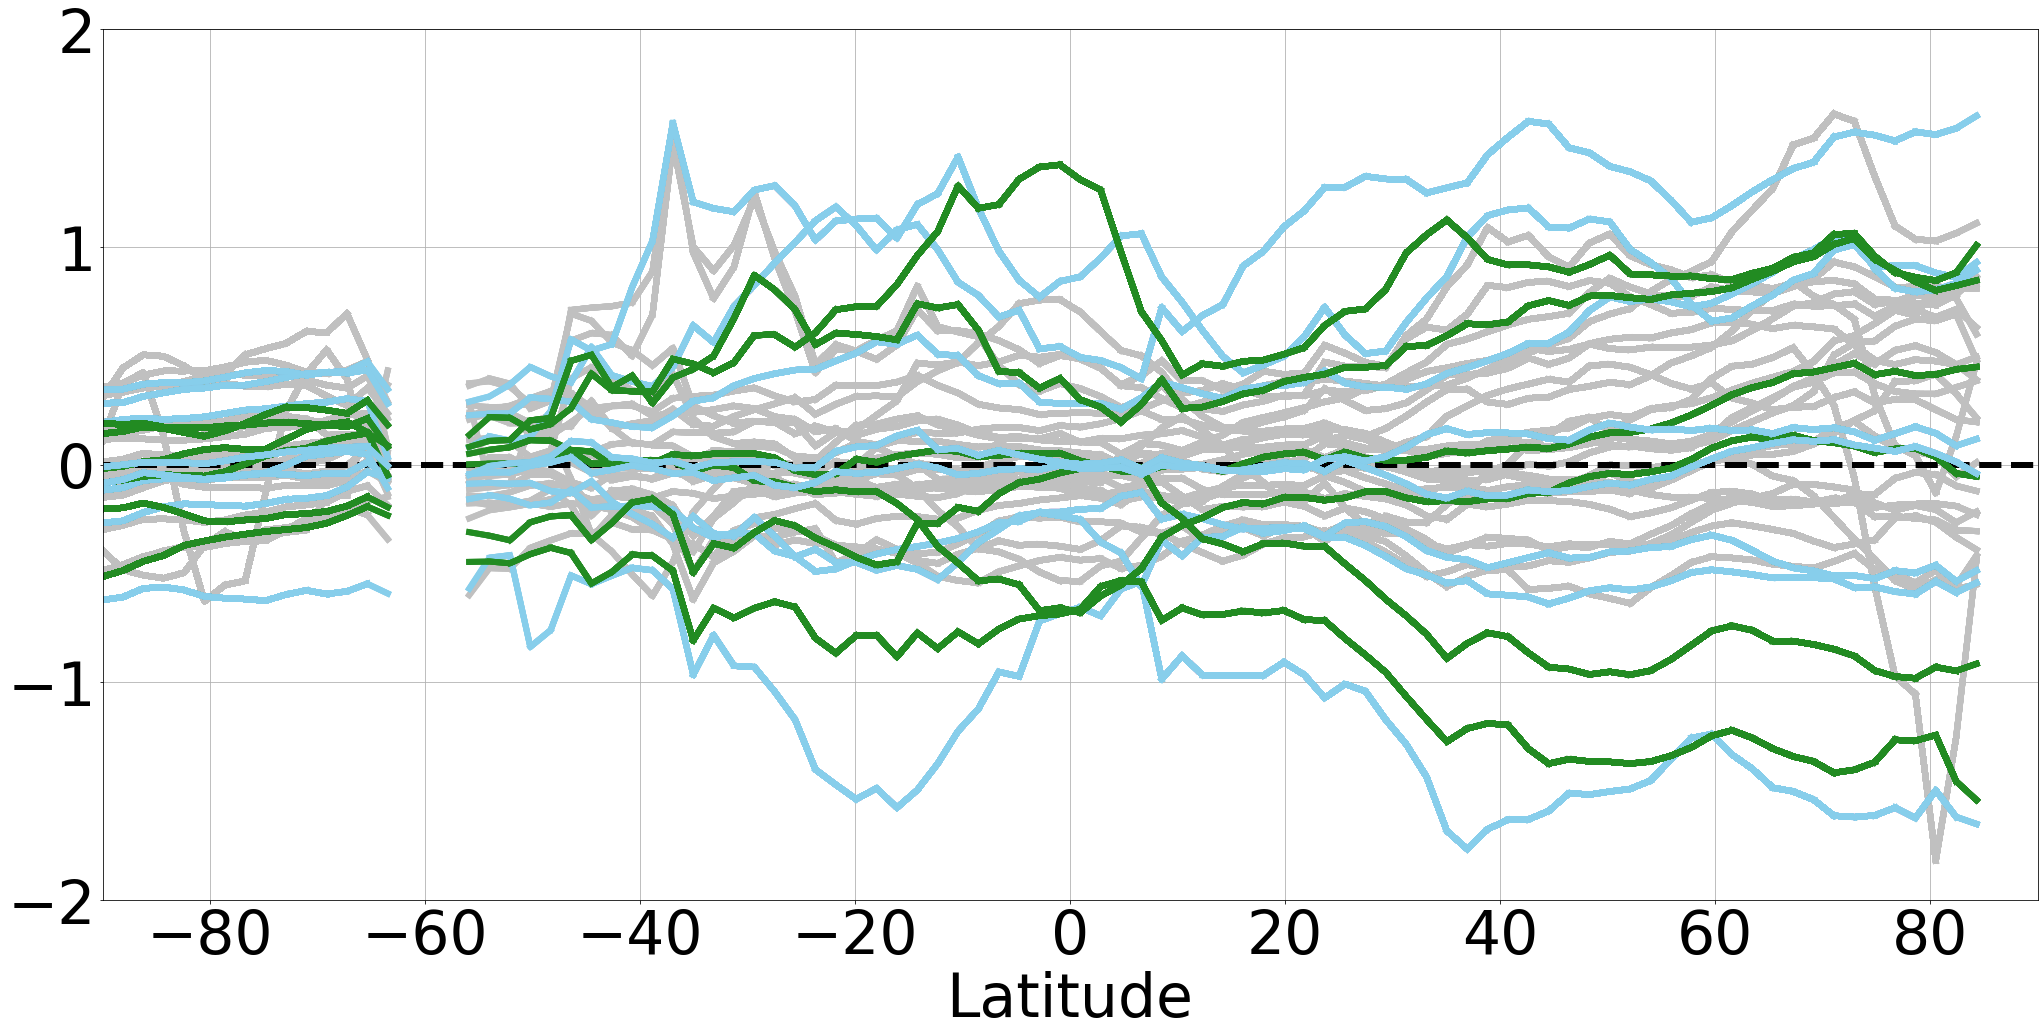

In [113]:
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(30,16))
plt.grid()
lwidth=6

for i,key in enumerate(ds.ensemble_key.values):
    desc=descriptions[i]
    if desc not in descs_plantwater:
        if desc not in descs_hydro:
            color='silver'
            plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
        
plt.axhline(y=0,linestyle='--',color='k', linewidth=lwidth)

for i,key in enumerate(ds.ensemble_key.values):
    desc=descriptions[i]
    if desc in descs_plantwater:
        color='forestgreen'
        plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
    elif desc in descs_hydro:
        color='skyblue'
        plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
plt.xlim([-90,90])
plt.ylim([-2,2])
plt.xlabel('Latitude')
plt.tight_layout()
plt.savefig('Figure1a.eps')    

# Figure 1b

In [27]:
delta_Ts=(ds.TSKIN*landweights).mean(dim=['lat','lon'])

In [40]:
crosswalk['delta_TSKIN']=np.nan
for i, key in enumerate(ds.ensemble_key.values):
    crosswalk.loc[crosswalk.Key_short==key,['delta_TSKIN']]=delta_Ts.values[i]

In [95]:
params=['frac_sat_soil_dsl_init','d_max', 'fff','sand_pf',
        'upplim_destruct_metamorph', 
        'z0mr', 'zetamaxstable', 'zsno',
        'medlynintercept','kmax','medlynslope',
        'jmaxb0', 'jmaxb1', 'tpu25ratio',
        'maximum_leaf_wetted_fraction',
        'rhosnir',
        'lmrha',
        'nstem',
        ]
param_colors=['skyblue','skyblue', 'skyblue','skyblue',
        '#F8CBAD', 
              'purple', 'purple', 'purple',
        'forestgreen', 'forestgreen', 'forestgreen',
        'lightseagreen', 'lightseagreen','lightseagreen',
              '#6CD2E9',
              'goldenrod',
              'lightgreen',
        'orange',
              ]

In [115]:
legend_categories=['Soil hydrology',
        'Snow', 
        'Roughness / boundary layer',
        'Plant water use',
        'Photosynthesis',
                   'Canopy evaporation',
        'Plant radiative properties',
        'Temperature acclimation',
        'Biomass heat storage',
        ]
category_colors=['skyblue',
        '#F8CBAD', 
              'purple', 
        'forestgreen', 
        'lightseagreen', 
               '#6CD2E9',
              'goldenrod',
              'lightgreen',
        'orange',
              ]

### Make legend

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


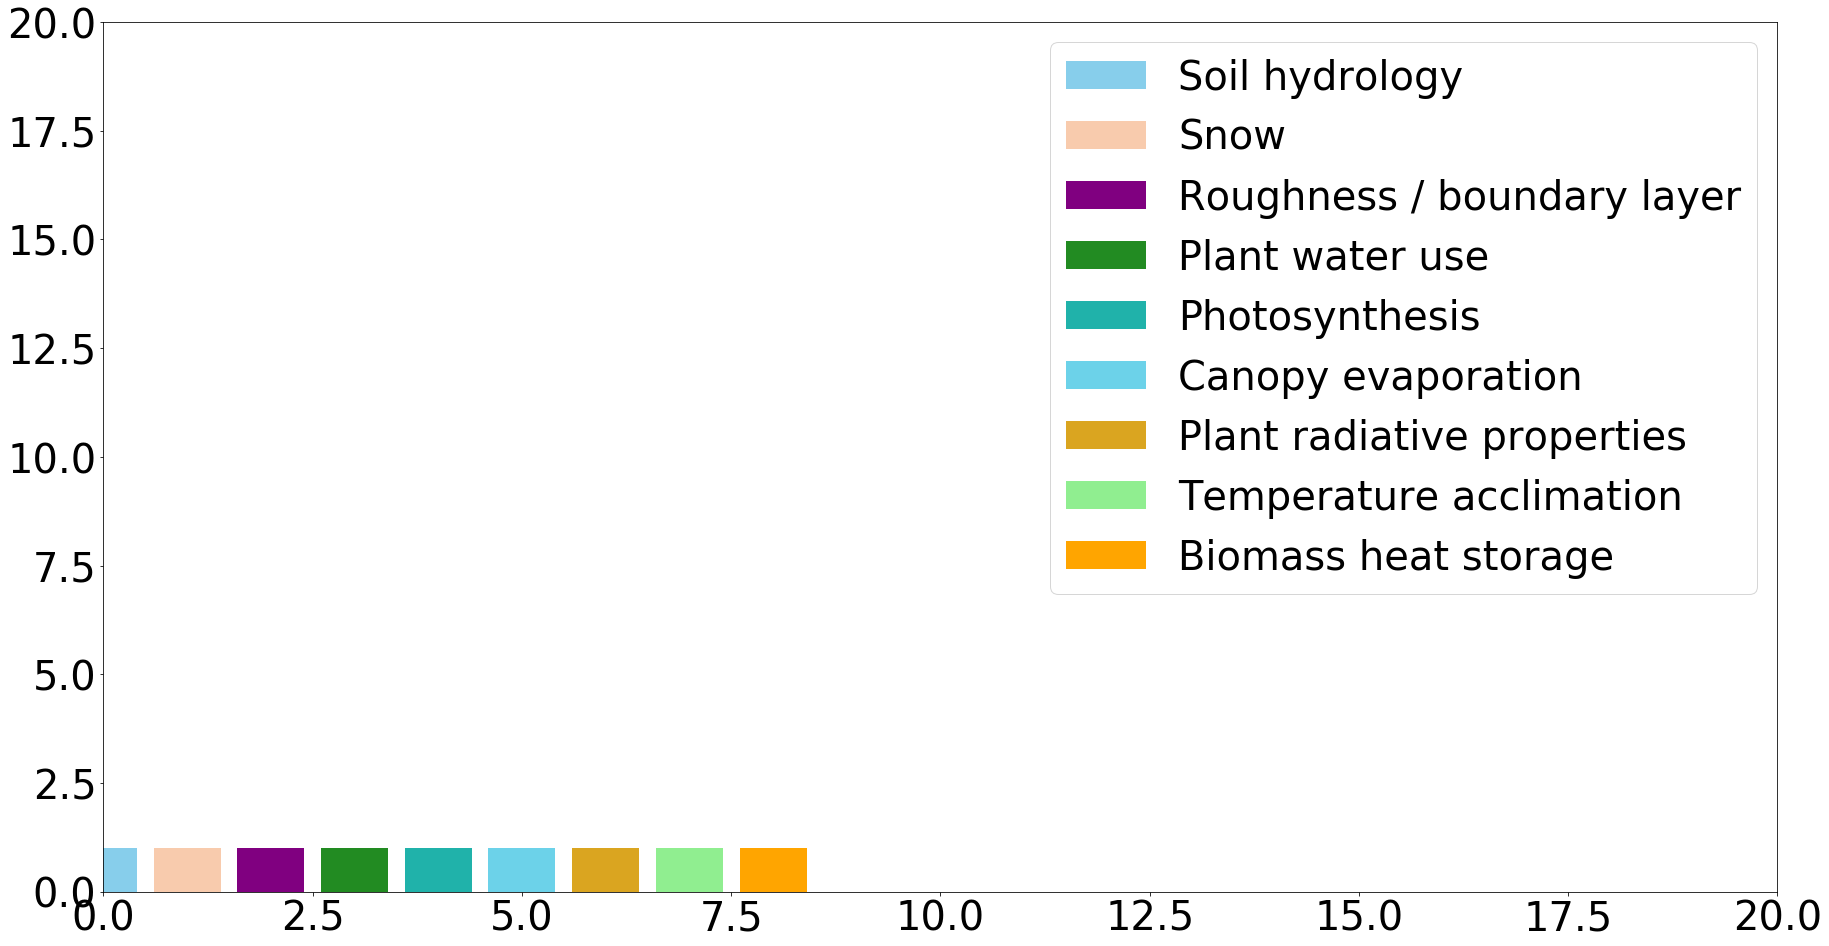

In [116]:
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(30,16))
for i, category in enumerate(legend_categories):
    plt.bar(i,1, color=category_colors[i], label=category)
plt.ylim([0,20])
plt.xlim([0,20])
plt.legend()
plt.savefig('Figure1b_legend.eps')  

### Make figure

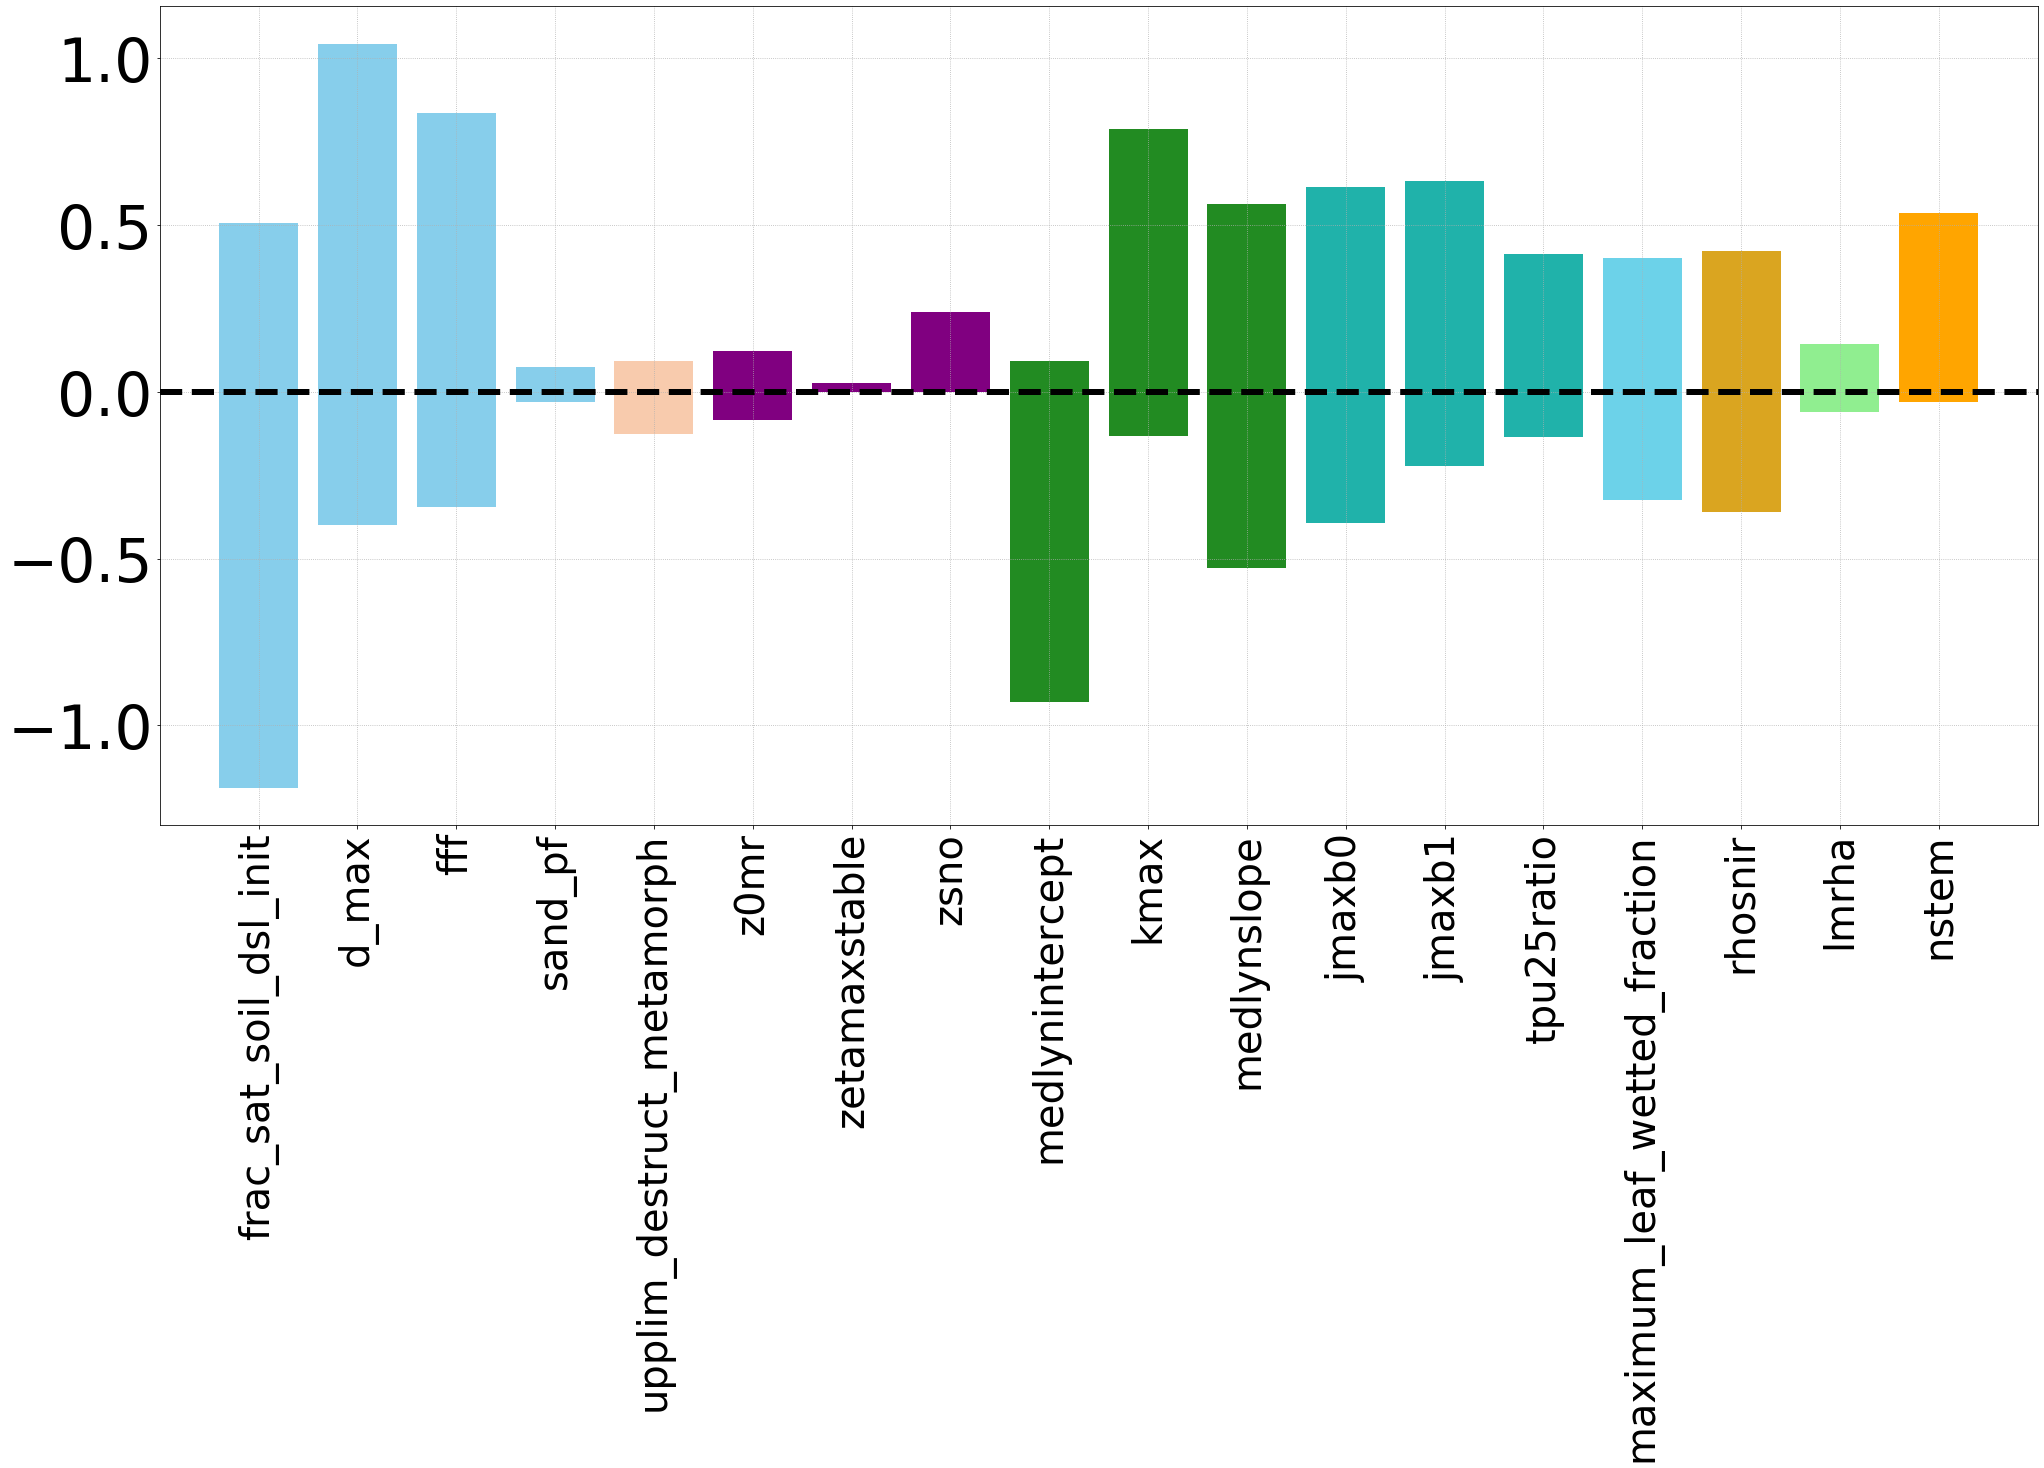

In [112]:
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(30,22))
plt.axhline(y=0,linestyle='--',color='k', linewidth=lwidth)

for i, param in enumerate(params):
    minval=crosswalk['delta_TSKIN'].values[crosswalk.description==param+', min']
    maxval=crosswalk['delta_TSKIN'].values[crosswalk.description==param+', max']
    plt.bar(i,minval, color=param_colors[i])
    plt.bar(i,maxval, color=param_colors[i])
    
    #minval_PC0=crosswalk['PC0'].values[crosswalk.description==param+', min']
    #maxval_PC0=crosswalk['PC0'].values[crosswalk.description==param+', max']
    #plt.plot([i,i], 
    #         [minval_PC0,maxval_PC0],'x', markersize=20,linewidth=8, color='k')
    
    

xticks=plt.xticks(np.arange(0, i+1), params, rotation='vertical',fontsize=40)
plt.grid(linestyle=':')
plt.xlim([-1,np.size(params)])
plt.tight_layout()
plt.savefig('Figure1b.eps')

In [104]:
print(1)

1
